In [ ]:
! pip install kaggle


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# the path to the json file , please upload a json file in your google drive
!cp  /content/drive/MyDrive/kaggle.json   ~/.kaggle


cp: cannot stat '/content/drive/MyDrive/kaggle.json': No such file or directory


In [ ]:
! kaggle datasets download  rabieelkharoua/alzheimers-disease-dataset

'''import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))'''

Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
alzheimers-disease-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


"import os\n\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))"

In [ ]:
!  unzip -o /content/alzheimers-disease-dataset -d /content/


Archive:  /content/alzheimers-disease-dataset.zip
  inflating: /content/alzheimers_disease_data.csv  


# Necessary Imports

In [ ]:
# imports here
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
'''import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    print(f"Directory: {dirname}")
    for filename in filenames:
        print(f"  File: {filename}")
'''
data_dir = "/content/alzheimers_disease_data.csv"
alzheimer = pd.read_csv(data_dir)
alzheimer.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


## Data Preprocessing

In [ ]:

# check for missing values
print("Duplicate rows:", alzheimer.duplicated().sum())#check for any duplprint("Total missing values in all rows:", alzheimer.isnull().sum().sum())icate rows
alzheimer.drop(["PatientID","DoctorInCharge"], axis = 1, inplace = True) #drop redundant attributes ("Patienhttps://docs.google.com/presentation/d/1sPxKMjMua_K3MDQDzi3VNpr7z_z8VboeZPYUWGQr_Jk/edit?usp=sharingtID" and "DoctorInCharge")
print(alzheimer.head() )#check
alzheimer['Diagnosis'].value_counts()



Total missing values in all rows: 0
Duplicate rows: 0
   Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0   73       0          0               2  22.927749        0   
1   89       0          0               0  26.827681        0   
2   73       0          3               1  17.795882        0   
3   74       1          0               1  33.800817        1   
4   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  ...  \
0           13.297218          6.327112     1.347214      9.025679  ...   
1            4.542524          7.619885     0.518767      7.151293  ...   
2           19.555085          7.844988     1.826335      9.673574  ...   
3           12.209266          8.428001     7.435604      8.392554  ...   
4           18.454356          6.310461     0.795498      5.597238  ...   

   FunctionalAssessment  MemoryComplaints  BehavioralProblems       ADL  \
0              6.518877      

,count
Diagnosis,
0,1389
1,760


##Relationships

Highest positive correlation: ('MemoryComplaints', 'Diagnosis') with value 0.30674239370561934
Highest negative correlation: ('FunctionalAssessment', 'Diagnosis') with value -0.36489830657691513


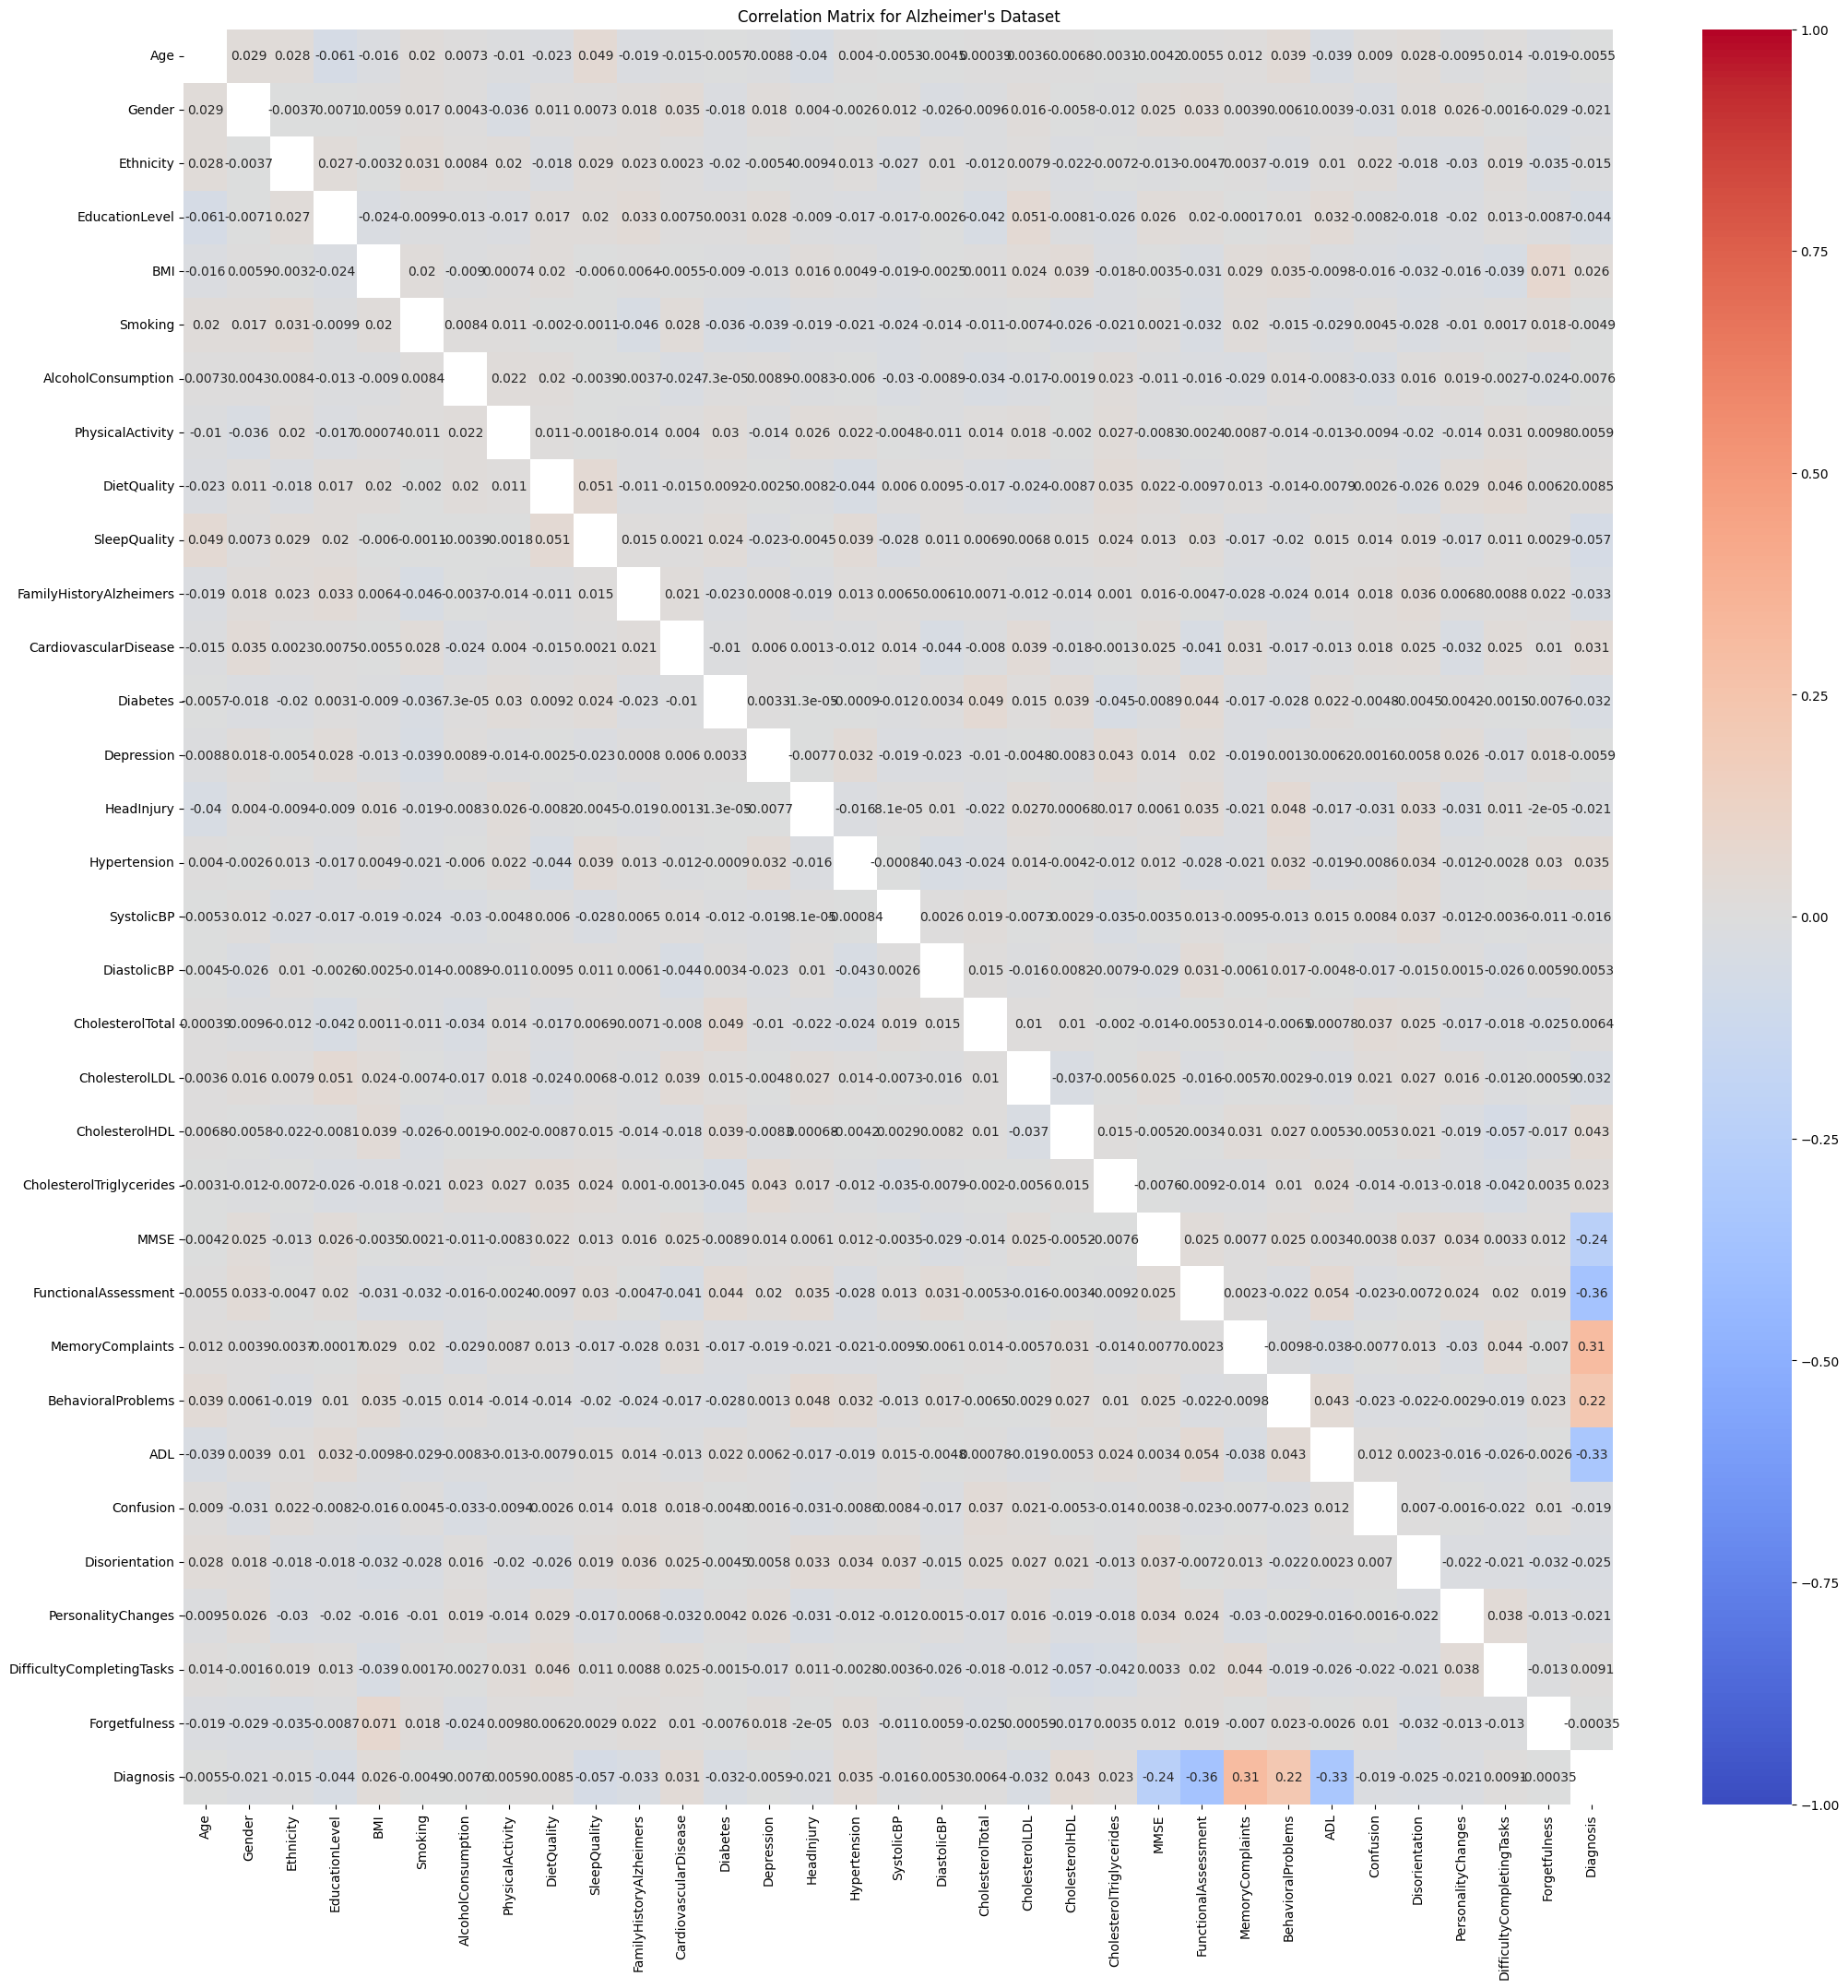

In [ ]:



numeric_data = alzheimer.select_dtypes(include=[float, int]) #Select only numeric columns for correlation calculation
correlation_matrix = numeric_data.corr()
np.fill_diagonal(correlation_matrix.values, np.nan)

plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Alzheimer\'s Dataset')
plt.show

# Highest positive correlation
max_positive_corr = correlation_matrix.stack().idxmax()
max_positive_value = correlation_matrix.loc[max_positive_corr]

# Highest negative correlation
max_negative_corr = correlation_matrix.stack().idxmin()
max_negative_value = correlation_matrix.loc[max_negative_corr]

print(f"Highest positive correlation: {max_positive_corr} with value {max_positive_value}")
print(f"Highest negative correlation: {max_negative_corr} with value {max_negative_value}")


##preprocessing

In [ ]:
# one hot encode categorical data
alzheimer = pd.get_dummies(alzheimer, columns=['Ethnicity', 'EducationLevel'], drop_first=True)

alzheimer = alzheimer.astype(int)
print(alzheimer.head(5))


   Age  Gender  BMI  Smoking  AlcoholConsumption  PhysicalActivity  \
0   73       0   22        0                  13                 6   
1   89       0   26        0                   4                 7   
2   73       0   17        0                  19                 7   
3   74       1   33        1                  12                 8   
4   89       0   20        0                  18                 6   

   DietQuality  SleepQuality  FamilyHistoryAlzheimers  CardiovascularDisease  \
0            1             9                        0                      0   
1            0             7                        0                      0   
2            1             9                        1                      0   
3            7             8                        0                      0   
4            0             5                        0                      0   

   ...  PersonalityChanges  DifficultyCompletingTasks  Forgetfulness  \
0  ...                   0

In [ ]:
scaler = StandardScaler()  # standardize  numerical columns
numerical_cols = ['Age', 'BMI', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal',
                  'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'PhysicalActivity']
alzheimer[numerical_cols] = scaler.fit_transform(alzheimer[numerical_cols])
print(alzheimer.head(5))

        Age  Gender       BMI  Smoking  AlcoholConsumption  PhysicalActivity  \
0 -0.212368       0 -0.715039        0                  13          0.552242   
1  1.567757       0 -0.160002        0                   4          0.903772   
2 -0.212368       0 -1.408834        0                  19          0.903772   
3 -0.101111       1  0.811311        1                  12          1.255303   
4  1.567757       0 -0.992557        0                  18          0.552242   

   DietQuality  SleepQuality  FamilyHistoryAlzheimers  CardiovascularDisease  \
0            1             9                        0                      0   
1            0             7                        0                      0   
2            1             9                        1                      0   
3            7             8                        0                      0   
4            0             5                        0                      0   

   ...  PersonalityChanges  Difficulty

In [ ]:
#scaling bounded features to a [0, 1] range using MinMaxScaler
bounded_cols = ['DietQuality', 'SleepQuality', 'PhysicalActivity']
minmax_scaler = MinMaxScaler()
alzheimer[bounded_cols] = minmax_scaler.fit_transform(alzheimer[bounded_cols])


In [ ]:
X = alzheimer.drop('Diagnosis', axis=1)
y = alzheimer['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.2, random_state=42)



#Decision tree


Accuracy: 0.913953488372093


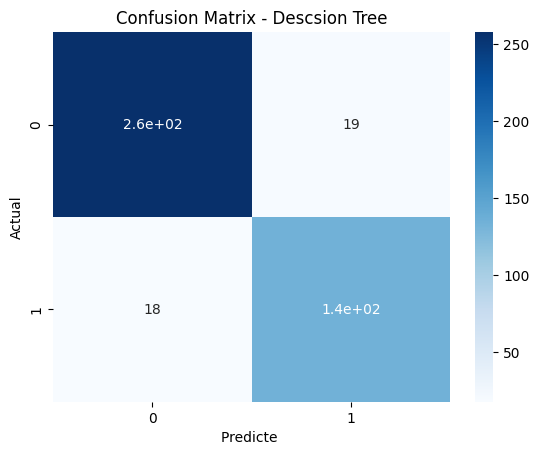

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       277
           1       0.88      0.88      0.88       153

    accuracy                           0.91       430
   macro avg       0.91      0.91      0.91       430
weighted avg       0.91      0.91      0.91       430



In [ ]:
tree_model = DecisionTreeClassifier(random_state=42, criterion = 'entropy')
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix,annot=True,cmap='Blues')
plt.title("Confusion Matrix - Descsion Tree")
plt.xlabel("Predicte ")
plt.ylabel("Actual")
plt.show()
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Naive Bayes

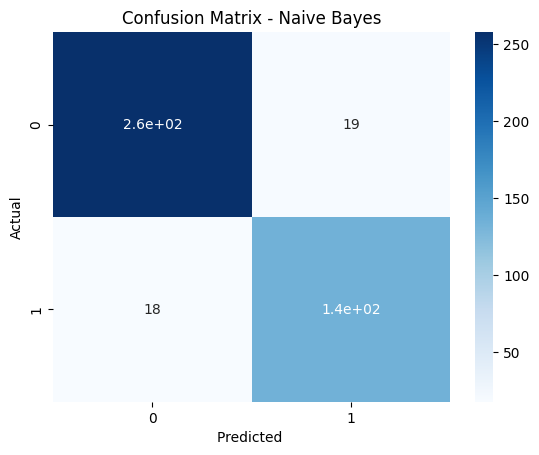

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.89      0.87       277
           1       0.78      0.74      0.76       153

    accuracy                           0.83       430
   macro avg       0.82      0.81      0.82       430
weighted avg       0.83      0.83      0.83       430



In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
pred_nb = nb.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix,annot=True,cmap='Blues')
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted ")
plt.ylabel("Actual")
plt.show()
class_report = classification_report(y_test, y_pred)
print("Classification Report: \n",classification_report(y_test,pred_nb))

# Neural Network Classification

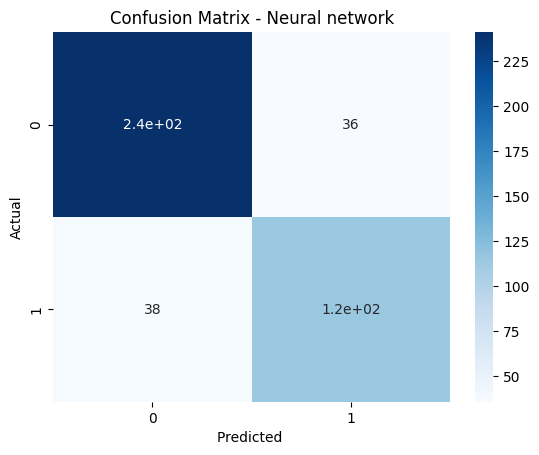

Classification report
                precision    recall  f1-score   support

           0       0.86      0.87      0.87       277
           1       0.76      0.75      0.76       153

    accuracy                           0.83       430
   macro avg       0.81      0.81      0.81       430
weighted avg       0.83      0.83      0.83       430



In [ ]:
#neural network classification
neural_network = MLPClassifier(hidden_layer_sizes=(10,10,10),activation="logistic",max_iter=10000)
neural_network.fit(X_train,y_train)
yneural_pred1= neural_network.predict(X_test)
conf_matrix_neural=confusion_matrix(y_test,yneural_pred1)
class_report_neural=classification_report(y_test,yneural_pred1)
sns.heatmap(conf_matrix_neural,annot=True,cmap='Blues')
plt.title("Confusion Matrix - Neural network")
plt.xlabel("Predicted ")
plt.ylabel("Actual")
plt.show()
print("Classification report\n ",class_report_neural)
